# Neural Network 201
In this example, we will walk through two-input single output neural network model. We will train this model to predict used cars' prices based on two features: age and mileage.

The following contents will be covered:
1. Preprocess the data.
2. Construct multi-input linear model.
3. Vector and matrix operations.
4. Rectified linear unit (ReLU) activation.


## Load Data
Data is from [Used Car Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data). Data is prepocessed and shuffled. Take out N/As and outliers. 90% are used for training the model. We'll use the rest 10% samples to evaluate and test the model. 

First, let's load the data as numpy arrays.

In [60]:
import numpy as np
age_train = np.load('age_train.npy')
mileage_train = np.load('mileage_train.npy')
price_train = np.load('price_train.npy')
age_test = np.load('age_test.npy')
mileage_test = np.load('mileage_test.npy')
price_test = np.load('price_test.npy')
print(age_train.shape, mileage_train.shape, price_train.shape, age_test.shape, mileage_test.shape, price_test.shape)  # check dimensions of the arrays

(268577,) (268577,) (268577,) (29842,) (29842,) (29842,)


## Visualize the Data
Use [matplotlib](https://matplotlib.org/). **Note**: `matplotlib` will auto scale the figure to better fill the space.

[Text(0.5, 0, 'Mileage (miles)'), Text(0, 0.5, 'Price ($)')]

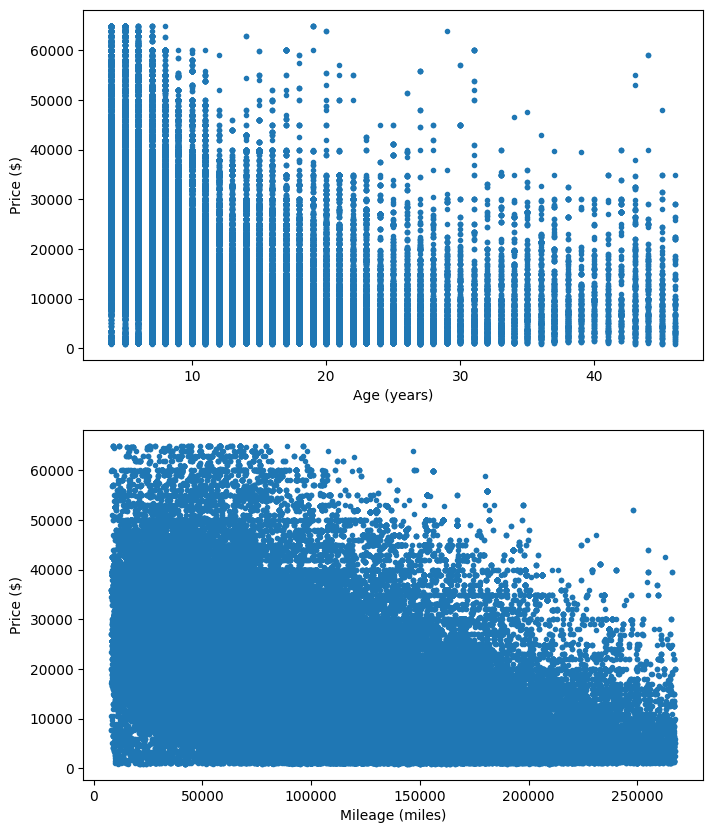

In [61]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(age_train, price_train, '.')
axs[0].set(xlabel='Age (years)', ylabel='Price ($)')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(mileage_train, price_train, '.')
axs[1].set(xlabel='Mileage (miles)', ylabel='Price ($)')


## Pre-process the Data
1. Rescale `age`, `mileage` and `price` arrays to avoid large parameters in model. 
2. Stack the rescaled `age` and `mileage` arrays to form a feature matrix, or a 2d-array with shape (M, 2). 
3. Reshape rescaled `price` array to a column vector, or a 2d-array with shape (M, 1).
> M represents number of samples.

(268577, 2) (268577, 1) (29842, 2) (29842, 1)


[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

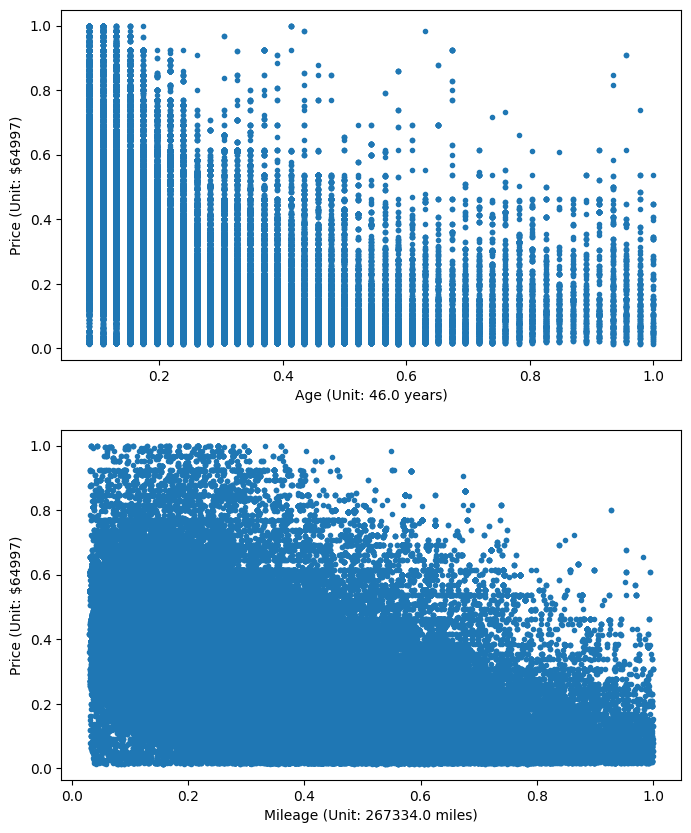

In [62]:
# Rescale
# age_train_rescale = age_train / 10
# mileage_train_rescale = mileage_train / 1e4
# price_train_rescale = price_train / 1e4
# age_test_rescale = age_test / 10
# mileage_test_rescale = mileage_test / 1e4
# price_test_rescale = price_test / 1e4
age_train_rescale = age_train / age_train.max()
mileage_train_rescale = mileage_train / mileage_train.max()
price_train_rescale = price_train / price_train.max()
age_test_rescale = age_test / age_train.max()
mileage_test_rescale = mileage_test / mileage_train.max()
price_test_rescale = price_test / price_train.max()

# Stack features
X_train = np.stack((age_train_rescale, mileage_train_rescale), axis=1)
X_test = np.stack((age_test_rescale, mileage_test_rescale), axis=1)
# Reshape labels
y_train = price_train_rescale.reshape(-1, 1)
y_test = price_test_rescale.reshape(-1, 1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)  # for debug

# Visualize preprocessed data
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_train[:, 0], y_train, '.')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_train[:, 1], y_train, '.')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

## Create an Initial Model
Create a linear model: $\hat{y}=w_1x_1 + w_2x_2 + b$. Initialize three parameters, $w_1$, $w_2$ and $b$ to small values (close to 0).

(268577, 1)


[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

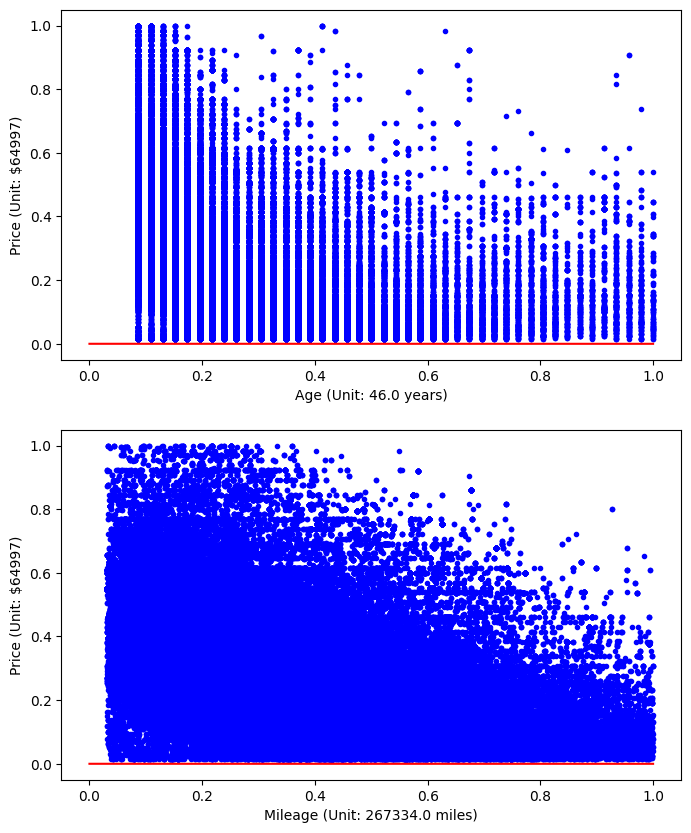

In [63]:
# Define model function
def forward(input, weight, bias):
    """ Model function
    Args:
        input: feature matrix, 2d-array with shape (number of samples, number of features)
        weight: row vector of weights, 2d-array with shape (1, number of features)
        bias: scalar
    Returns:
        output: column vector of predictions, 2d-array with shape (number of samples, 1)
    """
    output = np.dot(input, weight.T) + bias
    return output

# Initialize model parameters: w1, w2, b
w = np.zeros((1, 2)) + np.random.normal(0, 1e-4, (1, 2)) 
b = 0 + np.random.normal(0, 1e-4)
y_pred = forward(X_train, w, b)
print(y_pred.shape)

# Visualize intial model on two planes
x1 = np.linspace(0, 1, 2)  # create 2 evenly distributed independent variables 
x2 = np.linspace(0, 1, 2)  # create 2 evenly distributed independent variables 
yhat = forward(np.stack((x1, x2), axis=1), w, b)  # 10 dependent variables based on initial model
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_train[:, 0], y_train, 'b.')
axs[0].plot(x1, yhat, 'r')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_train[:, 1], y_train, 'b.')
axs[1].plot(x2, yhat, 'r')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

## Create Loss Function
Use Mean Square Error function to evaluate how bad the model was.

In [64]:
def mse_loss(prediction, target):  # mean square error function
    loss_value = np.mean(1 / 2 * (prediction - target) ** 2)
    return loss_value

# Evaluate initial model
loss = mse_loss(prediction=y_pred, target=y_train)
print(f"mse loss: {loss}")

mse loss: 0.05141060311218826


## Gradient Descent Optimization

loss @ 1 iteration: 0.05141060311218826
loss @ 2 iteration: 0.04987154455577891
loss @ 3 iteration: 0.04840552742487336
loss @ 4 iteration: 0.04700905555565911
loss @ 5 iteration: 0.04567880017895901
loss @ 6 iteration: 0.04441159190537584
loss @ 7 iteration: 0.0432044130941881
loss @ 8 iteration: 0.04205439058762342
loss @ 9 iteration: 0.040958788793015025
loss @ 10 iteration: 0.039915003096184676
loss @ 11 iteration: 0.03892055359019287
loss @ 12 iteration: 0.037973079104356836
loss @ 13 iteration: 0.037070331519159
loss @ 14 iteration: 0.03621017035335789
loss @ 15 iteration: 0.03539055761026828
loss @ 16 iteration: 0.03460955287080143
loss @ 17 iteration: 0.03386530862145072
loss @ 18 iteration: 0.03315606580597346
loss @ 19 iteration: 0.03248014959005817
loss @ 20 iteration: 0.03183596532877975
loss @ 21 iteration: 0.03122199472713286
loss @ 22 iteration: 0.030636792184399204
loss @ 23 iteration: 0.030078981313546374
loss @ 24 iteration: 0.029547251627278105
loss @ 25 iteration: 0

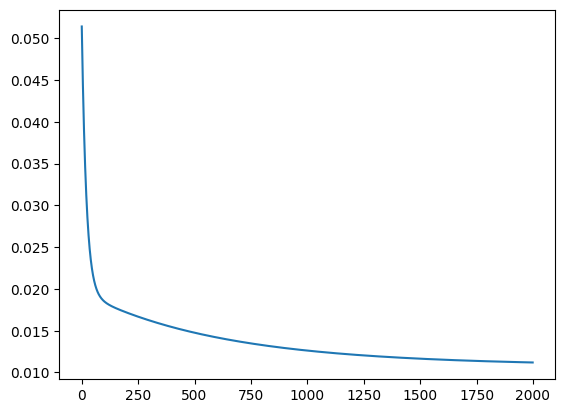

In [65]:
# Define gradient computation function
def grad(prediction, target, input):
    # dw = np.mean((pred - true) * input, axis=0)  # dL/dw
    # db = np.mean(pred - true)  # dL/db
    dw = 1 / target.shape[0] * np.dot((prediction - target).T, input)
    db = (prediction - target).mean()
    
    return dw, db

# Optimization
num_iters = 2000
learning_rate = 0.02
weights = [w]
biases = [b]
losses = []
for i in range(num_iters):
    y_pred = forward(X_train, w, b)
    dw, db = grad(y_pred, y_train, X_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    weights.append(w)
    biases.append(b)
    losses.append(loss)
print(f"updated w={w}, b={b}")
# Observe loss values
plt.plot(losses)

## Evaluate Trained Model
Now, we can use the updated model with updated $w_1$, $w_2$ and $b$ to predict car prices.
### Visualize Model using Training Data 


[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

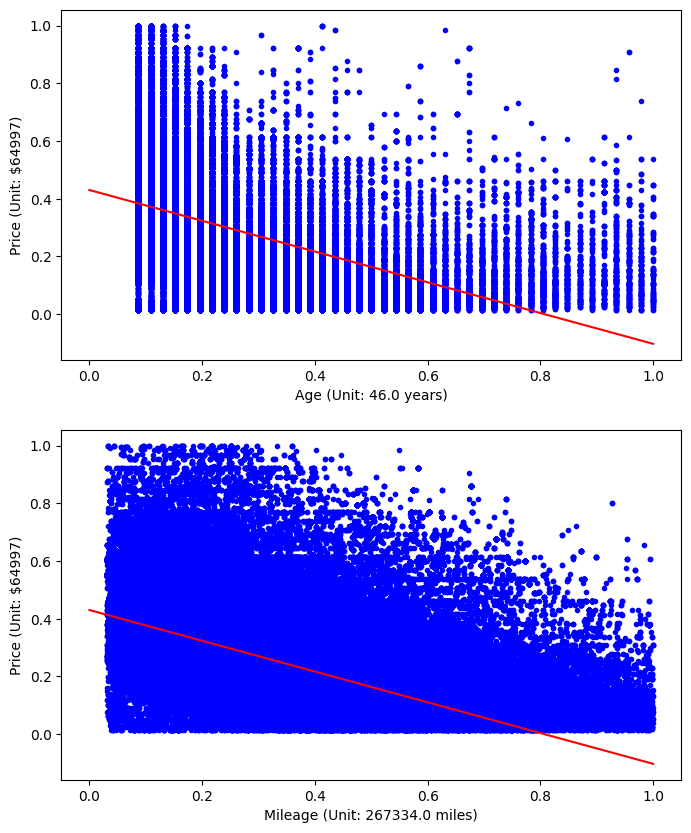

In [66]:
# Visualize model on two dimensions
yhat = forward(np.stack((x1, x2), axis=1), w, b)
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_train[:, 0], y_train, 'b.')
axs[0].plot(x1, yhat, 'r')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_train[:, 1], y_train, 'b.')
axs[1].plot(x2, yhat, 'r')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

### Assess Model with Test Data

Model's mse on test data: 0.011566501339189336


[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

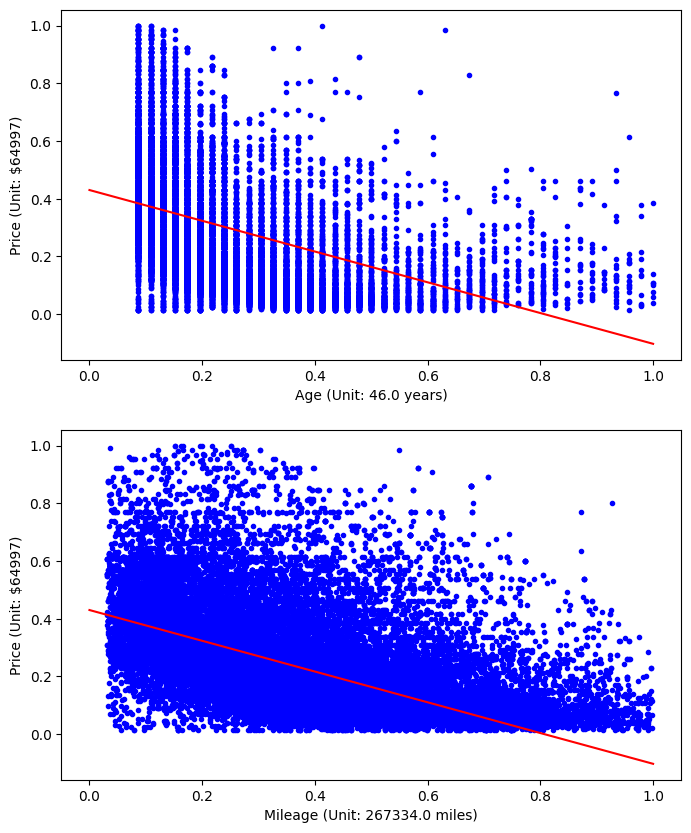

In [67]:
# Compute MSE
print(f"Model's mse on test data: {mse_loss(forward(X_test, w, b), y_test)}")

# Visualization
yhat = forward(np.stack((x1, x2), axis=1), w, b)
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_test[:, 0], y_test, 'b.')
axs[0].plot(x1, yhat, 'r')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_test[:, 1], y_test, 'b.')
axs[1].plot(x2, yhat, 'r')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

## Compare to Single Feature
Is model trained with two-feature data (`X_train`) better than the model trained with only one feature (`X_train[:, 0]` or `X_train[:, 1]`)?

loss @ 1 iteration: 0.05134554216504285
loss @ 2 iteration: 0.04985570319693349
loss @ 3 iteration: 0.048433378329911
loss @ 4 iteration: 0.0470754879718111
loss @ 5 iteration: 0.04577909303409375
loss @ 6 iteration: 0.044541388521444396
loss @ 7 iteration: 0.04335969741384597
loss @ 8 iteration: 0.042231464827778106
loss @ 9 iteration: 0.04115425244380836
loss @ 10 iteration: 0.04012573318842149
loss @ 11 iteration: 0.039143686158487435
loss @ 12 iteration: 0.038205991777297534
loss @ 13 iteration: 0.037310627171603994
loss @ 14 iteration: 0.03645566175957934
loss @ 15 iteration: 0.03563925304007286
loss @ 16 iteration: 0.03485964257397979
loss @ 17 iteration: 0.03411515214895842
loss @ 18 iteration: 0.03340418011912981
loss @ 19 iteration: 0.032725197911776645
loss @ 20 iteration: 0.03207674669342217
loss @ 21 iteration: 0.03145743418801728
loss @ 22 iteration: 0.030865931640296204
loss @ 23 iteration: 0.030300970917677254
loss @ 24 iteration: 0.02976134174438793
loss @ 25 iteration:

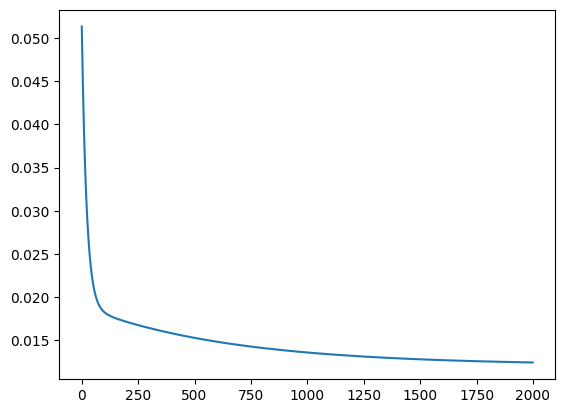

In [68]:
# Initialize model parameters: w1, b1
w_1 = np.zeros((1, 1)) + np.random.normal(0, 1e-4, (1, 1)) 
b_1 = 0 + np.random.normal(0, 1e-4)
# y_pred = forward(X_train[:,0].reshape(-1, 1), w_1, b_1)
# print(y_pred.shape)

# Train a model
num_iters = 2000
learning_rate = 0.02
losses = []
for i in range(num_iters):
    y_pred = forward(X_train[:, 1].reshape(-1, 1), w_1, b_1)
    dw_1, db_1 = grad(y_pred, y_train, X_train[:, 1].reshape(-1, 1))
    loss = mse_loss(y_pred, y_train)
    w_1 = w_1 - learning_rate * dw_1
    b_1 = b_1 - learning_rate * db_1
    print(f"loss @ {i+1} iteration: {loss}")
    losses.append(loss)
print(f"updated w1={w_1}, b={b_1}")
# Observe loss values
plt.plot(losses)
print(f"Model's mse on test data: {mse_loss(forward(X_test[:, 1].reshape(-1, 1), w_1, b_1), y_test)}")


## ReLU Activation
Negative car price does not make sense. The output needs to be regulated to only output non-negative value.

loss @ 1 iteration: 0.05131915968988337
loss @ 2 iteration: 0.049784394838482175
loss @ 3 iteration: 0.04832246599511784
loss @ 4 iteration: 0.046929886831084
loss @ 5 iteration: 0.04560333794140501
loss @ 6 iteration: 0.04433965885252748
loss @ 7 iteration: 0.04313584041268349
loss @ 8 iteration: 0.04198901754660342
loss @ 9 iteration: 0.040896462357133345
loss @ 10 iteration: 0.03985557755714703
loss @ 11 iteration: 0.0388638902159381
loss @ 12 iteration: 0.037919045805035176
loss @ 13 iteration: 0.03701880252910335
loss @ 14 iteration: 0.03616102592828231
loss @ 15 iteration: 0.03534368373896457
loss @ 16 iteration: 0.034564841000639765
loss @ 17 iteration: 0.03382265539702331
loss @ 18 iteration: 0.03311537282025188
loss @ 19 iteration: 0.032441323147465354
loss @ 20 iteration: 0.03179891621960603
loss @ 21 iteration: 0.031186638012753107
loss @ 22 iteration: 0.030603046992773584
loss @ 23 iteration: 0.030046770644512714
loss @ 24 iteration: 0.029516502167166732
loss @ 25 iteration

[Text(0.5, 0, 'Mileage (Unit: 267334.0 miles)'),
 Text(0, 0.5, 'Price (Unit: $64997)')]

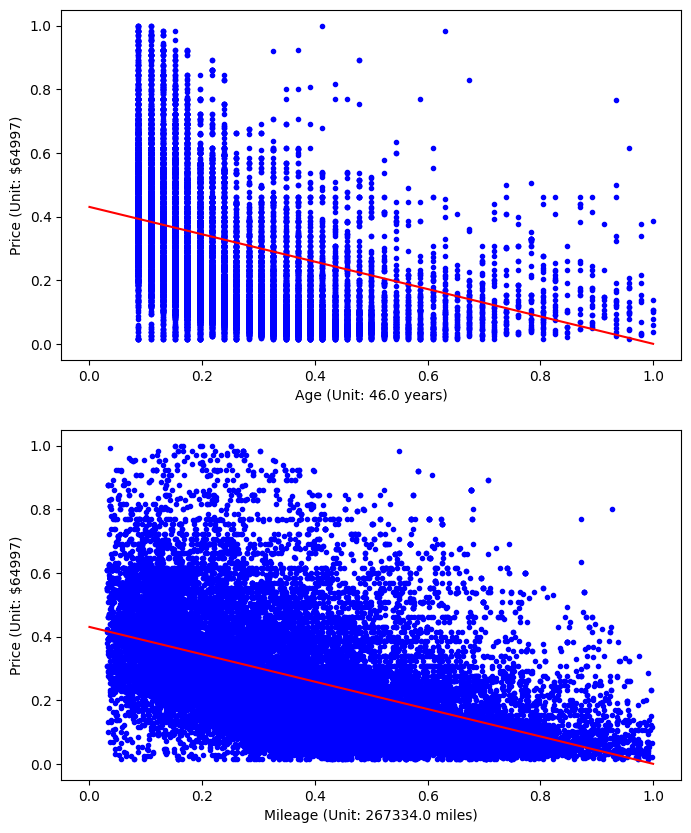

In [69]:
# Define ReLU function
def relu(x):
    y = x.copy()
    y[x<=0] = 0
    return y

# Define derivatives of ReLU function
def d_relu(x):
    dydx = np.zeros_like(x)
    dydx[x>0] = 1

    return dydx

# Redefine forward pass. Intermediate result, Z, needs to be tracked 
def forward(input, weight, bias):
    Z = np.dot(input, weight.T) + bias
    output = relu(Z)
    return output, Z

# Redefine gradient function. An exatra step to calculate dL/dZ will be added. 
def grad(prediction, target, Z, input):
    dZ = (prediction - target) * d_relu(Z)
    dw = 1 / target.shape[0] * np.dot(dZ.T, input)
    db = dZ.mean()
    
    return dw, db

# Optimization with ReLU activation
w = np.zeros((1, 2)) + np.random.uniform(0, 1e-4, (1, 2)) 
b = 0 + np.random.normal(0, 1e-4)
num_iters = 2000
learning_rate = 0.02
losses = []
for i in range(num_iters):
    y_pred, Z = forward(X_train, w, b)
    dw, db = grad(y_pred, y_train, Z, X_train)
    loss = mse_loss(y_pred, y_train)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {loss}")
    # print(f"w = {w}, b = {b}")
    losses.append(loss)
print(f"updated w={w}, b={b}")
print(f"Model's mse on test data: {mse_loss(forward(X_test, w, b), y_test)}")

# Visualize model on two dimensions
yhat, _ = forward(np.stack((x1, x2), axis=1), w, b)
fig, axs = plt.subplots(2,1)
fig.set_figwidth(8)
fig.set_figheight(10)
axs[0] = plt.subplot(2,1,1)
axs[0].plot(X_test[:, 0], y_test, 'b.')
axs[0].plot(x1, yhat, 'r')
axs[0].set(xlabel=f'Age (Unit: {age_train.max()} years)', ylabel=f'Price (Unit: ${price_train.max()})')
axs[1] = plt.subplot(2,1,2)
axs[1].plot(X_test[:, 1], y_test, 'b.')
axs[1].plot(x2, yhat, 'r')
axs[1].set(xlabel=f'Mileage (Unit: {mileage_train.max()} miles)', ylabel=f'Price (Unit: ${price_train.max()})')

## 